<a href="https://colab.research.google.com/github/Sathish6281/DEEPLEARNING1/blob/main/LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total time spanning: 0.0 days
0.101 % of all transactions are fraud. 


<ipython-input-2-b76e4132dd7b>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  (sns.distplot)(df[cn][df.Class ==1], bins=50)
<ipython-input-2-b76e4132dd7b>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class ==0], bins=50)
<ipython-input-2-b76e4132dd7b>:24: UserWarning: 

`distplot` is a depr

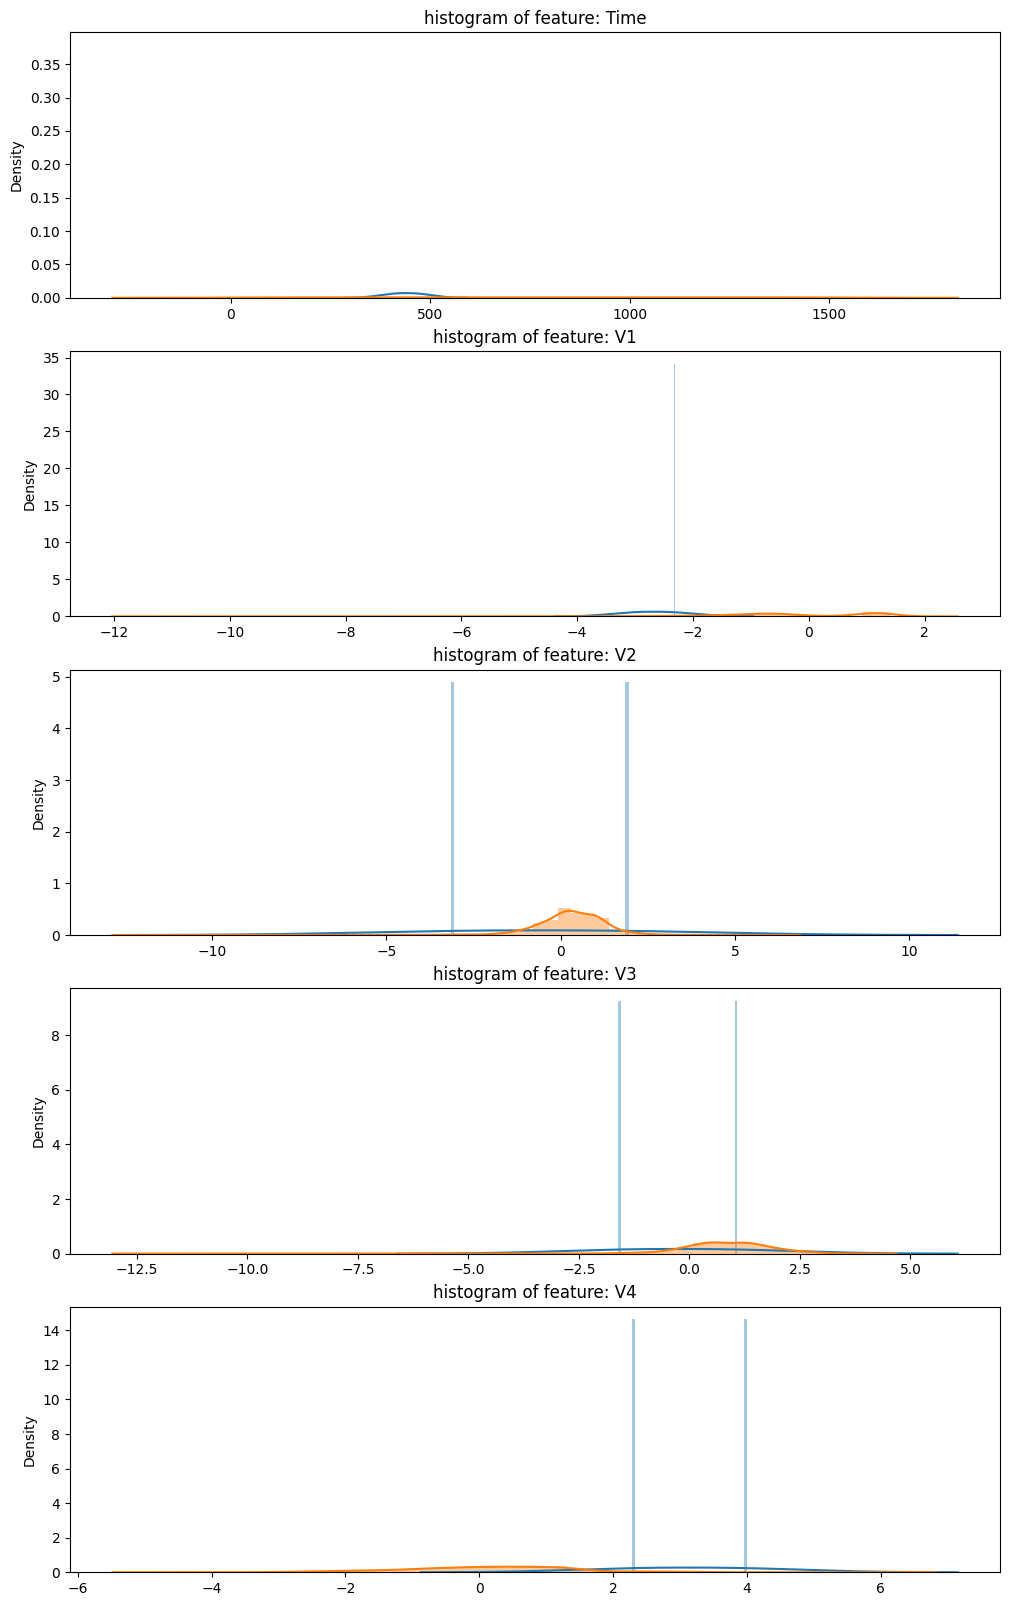

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Total train examples: 1489, total fraud cases: 2.0, equal to 0.00134 of total cases. 
Total test examples: 497, total fraud cases: nan, equal to nan of total cases. 
Epoch: 0001 cost= 1.793543935 Train auc= 0.973100 Time elapsed= 0:00:00.363629
Epoch: 0002 cost= 1.730205417 Train auc= 0.973100 Time elapsed= 0:00:00.463041
Epoch: 0003 cost= 1.784007311 Train auc= 0.973100 Time elapsed= 0:00:00.520814
Epoch: 0004 cost= 1.641914606 Train auc= 0.973100 Time elapsed= 0:00:00.598091
Epoch: 0005 cost= 1.689494014 Train auc= 0.973100 Time elapsed= 0:00:00.645557
Epoch: 0006 cost= 1.751419663 Train auc= 0.973100 Time elapsed= 0:00:00.692892
Epoch: 0007 cost= 1.665735245 Train auc= 0.972764 Time elapsed= 0:00:00.741285
Epoch: 0008 cost= 1.876913309 Train auc= 0.972764 Time elapsed= 0:00:00.840608
Epoch: 0009 cost= 1.652887702 Train auc= 0.972428 Time elapsed= 0:00:00.893823
Epoch: 0010 cost= 1.794669509 Train auc= 0.972428 Time elapsed= 0:00:00.954622
Optimization Finished!
Model saved in file: 

In [2]:
#9921005153-G.SATHEESH KUMAR
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
from datetime import datetime
from sklearn.metrics import roc_auc_score as auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
df = pd.read_csv('creditcard.csv')
df.shape
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0]* 100))
df.head()
df.columns
df.dtypes
plt.figure(figsize=(12,5*4))
gs= gridspec.GridSpec(5,1)
for i, cn in enumerate(df.columns[:5]):
    ax= plt.subplot(gs[i])
    (sns.distplot)(df[cn][df.Class ==1], bins=50)
    sns.distplot(df[cn][df.Class ==0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+ str(cn))
plt.show()
TEST_RATIO = 0.25
df.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * df.shape[0])
train_x = df.iloc[:TRA_INDEX, 1:-2].values
train_y = df.iloc[:TRA_INDEX, -1].values
test_x = df.iloc[TRA_INDEX:, 1:-2].values
test_y = df.iloc[TRA_INDEX:, -1].values
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))
cols_max = []
cols_min = []
for c in range(train_x.shape[1]):
    cols_max.append(train_x[:,c].max())
    cols_min.append(train_x[:,c].min())
    train_x[:, c] = (train_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
    test_x[:, c] = (test_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] = (test_x[:, c] - cols_mean[-1]) / cols_std[-1]
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
n_hidden_1 = 15
n_input = train_x.shape[1]
X = tf.placeholder("float", [None, n_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    # 'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    # 'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    # 'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    # 'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}
# Building the encoder


def encoder(x):
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),biases['encoder_b1']))
    return layer_1


def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                biases['decoder_b1']))
    return layer_1

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
save_model = os.path.join("C:\\Users\\anwar\Desktop\\New folder",'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0] / batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
          train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
          print("Epoch:", '%04d' % (epoch + 1),"cost=", "{:.9f}".format(c),"Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)),"Time elapsed=", "{}".format(datetime.now() - now))
          save_path = saver.save(sess, save_model)
print("Optimization Finished!")
print("Model saved in file: %s" % save_path)

{{hlist|Electronics|Movies and music|Home and furniture|Home improvement|Clothing|Footwear|Jewelry|Toys|Health and beauty|Pet supplies|Sporting goods and fitness|Auto|Photo finishing|Craft supplies|Party supplies|Grocery}}


{{Unbulleted list
  | [[Crude oil]]
  | [[Oil products]]
  | [[Natural gas]]
  | [[Petrochemical]]s
  | [[Power generation]]}}


[[Investment|Diversified investments]], [[Insurance#Types|Property & casualty insurance]], [[Public utility|Utilities]], [[Restaurants]], [[Food processing]], [[Aerospace]], [[Toys]], [[Mass media|Media]], [[Automotive industry|Automotive]], [[Sports equipment|Sporting goods]], [[Final good|Consumer products]], [[Internet]], [[Real estate]]


['pet supplies', 'clothing', 'jewelry', 'toys', 'fitness', 'photo finishing', 'sporting goods', 'health', 'movies', 'party supplies', 'home', 'furniture', 'electronics', 'beauty', 'music', 'craft supplies', 'footwear', 'home improvement', 'grocery', 'auto', 'power generation', 'oil products', 'crude 

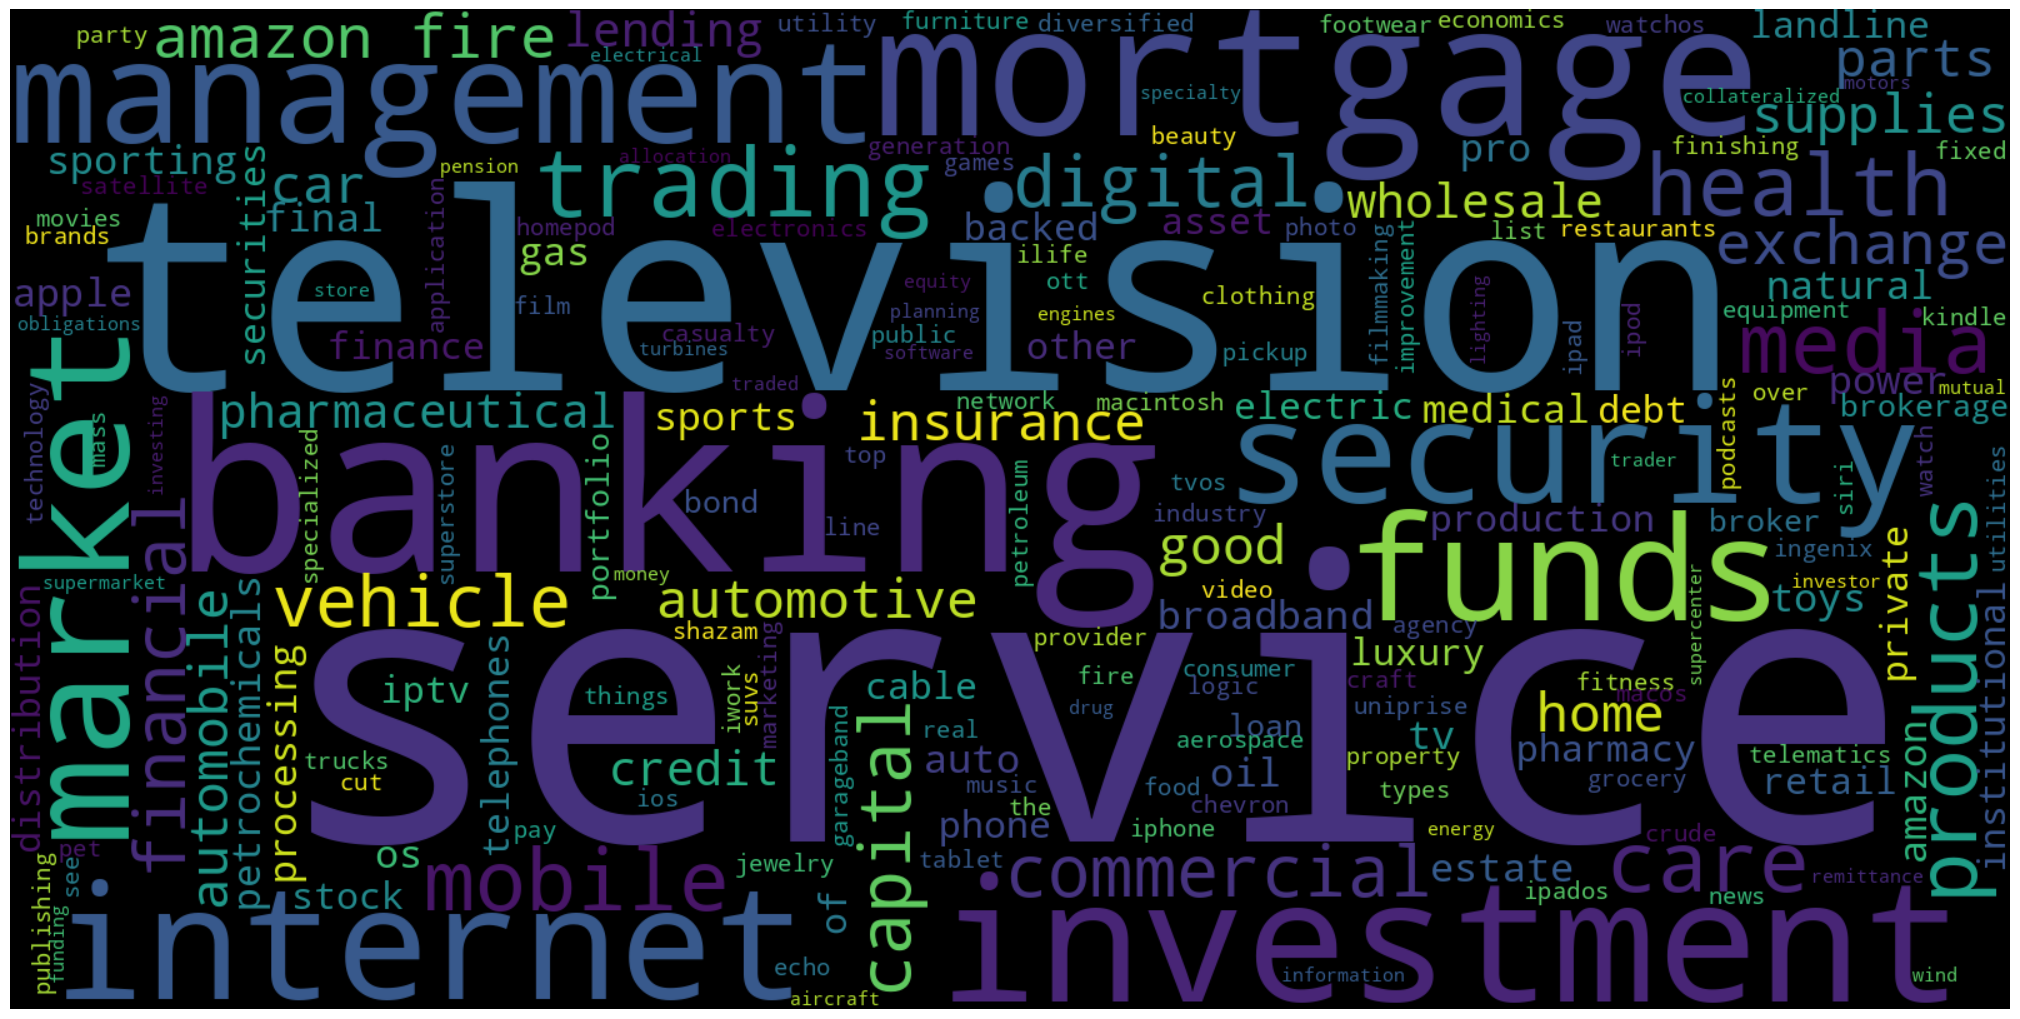

[[Retail]]
[[Energy industry|Energy]]: [[Oil and gas industry|Oil and gas]]
[[Conglomerate (company)|Conglomerate]]
{{Unbulleted list | [[Computer hardware]] | [[Computer software]] | [[Consumer electronics]] | [[Cloud computing]] | [[Digital distribution]] | [[Fabless manufacturing|Fabless silicon design]] | [[Semiconductors]] | [[Financial technology]] | [[Artificial intelligence]]}}
[[Managed health care]]
['retail', 'energy', 'gas', 'oil', 'gas industry', 'energy industry', 'conglomerate', 'company', 'computer hardware', 'cloud computing', 'computer software', 'digital distribution', 'fabless silicon design', 'financial technology', 'semiconductors', 'consumer electronics', 'artificial intelligence', 'fabless manufacturing', 'managed health care', 'healthcare', 'retail', 'health care', 'cloud computing', 'grocery stores', 'e-commerce', 'digital distribution', 'consumer electronics', 'artificial intelligence', 'technology company', 'telecommunications industry', 'telecommunications'

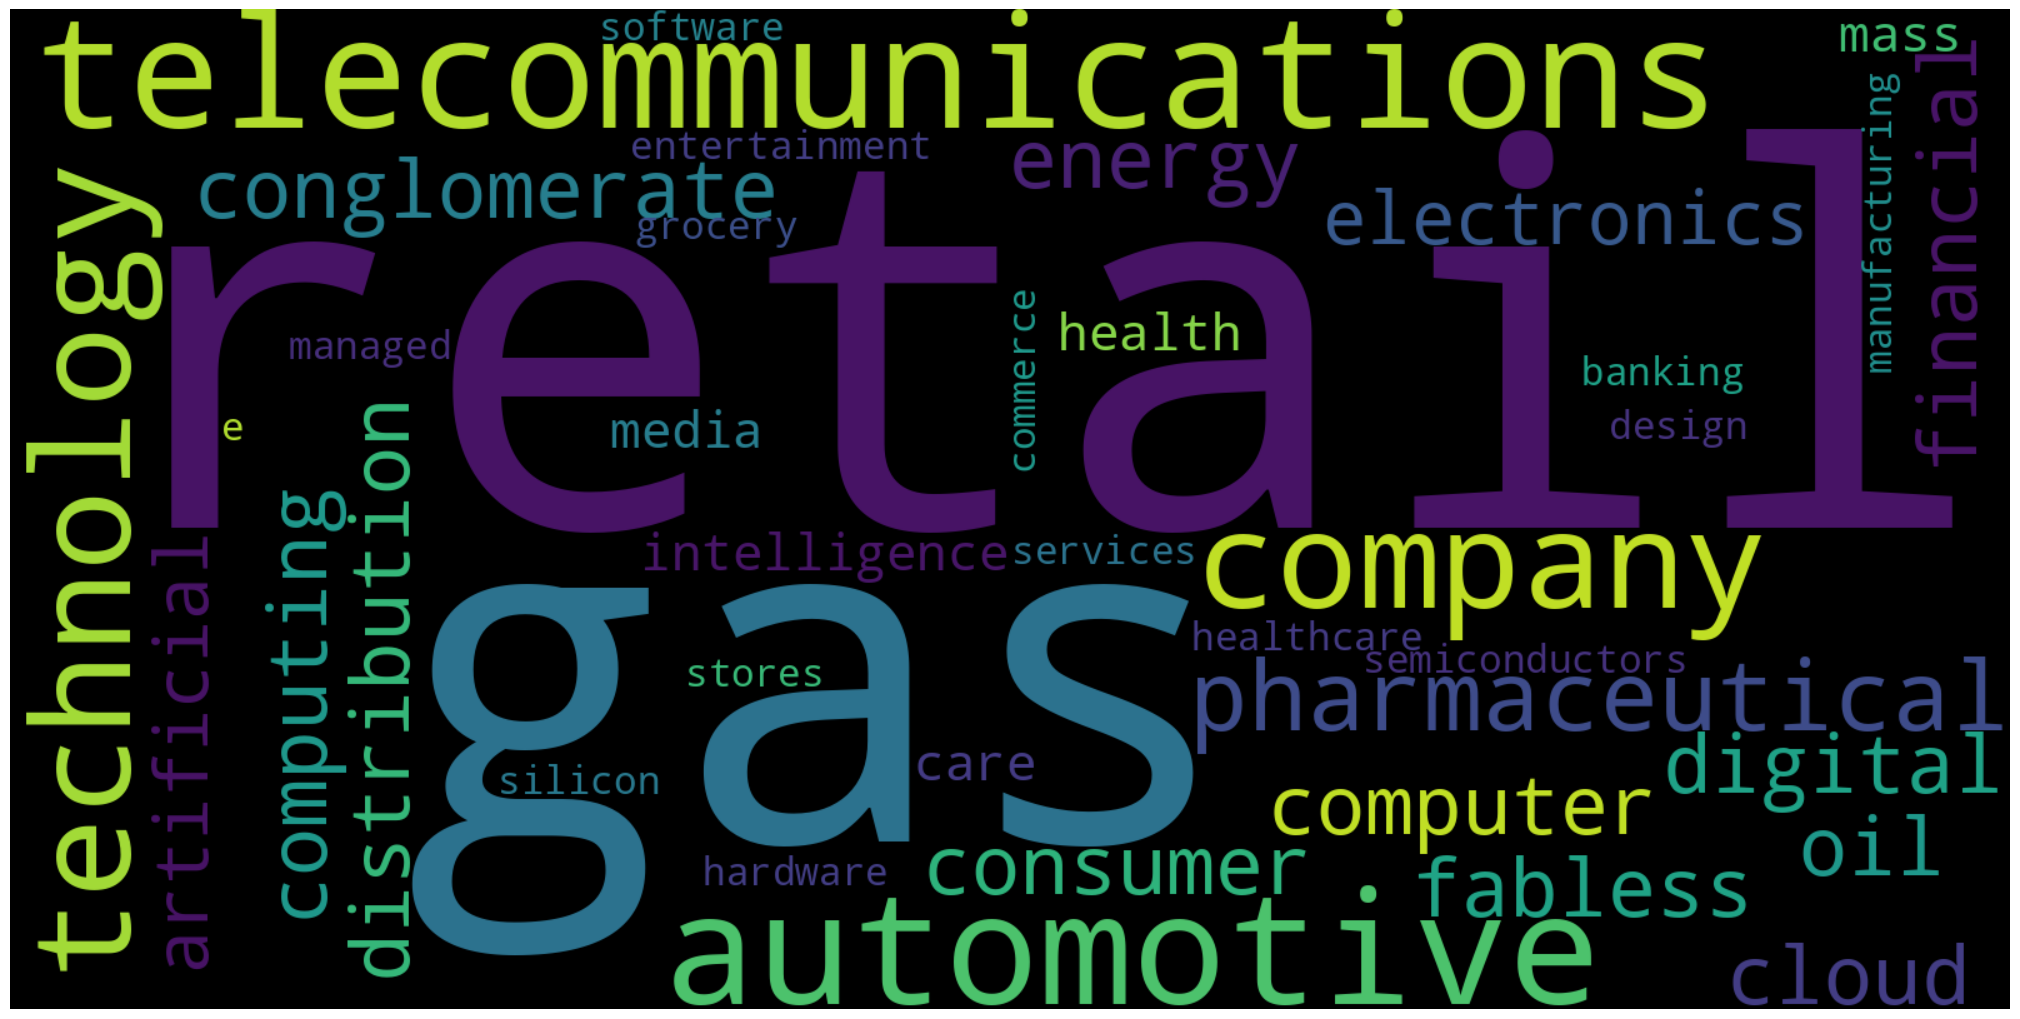

{{increase}} {{US$|219.295 billion}} (2019)
{{Nowrap|Decrease| |US$|346.2 billion|ref| name="201310K"}} {{Decrease}} {{US$|346.2 billion}}
{{increase}} US$707.8 billion (2018)
{{Decrease}} {{US$|338.516&nbsp;billion}}
{{increase}} $173.889 billion (2019)
{{nowrap|increase| |US$|60.381 billion| |small|(2018)|ref| name=FY}} {{increase}} {{US$|60.381 billion}} {{small|(2018)}}
{{increase}} {{US$|196.456 billion}}
{{decrease}} {{US$|162.648 billion}}
{{increase}} {{US$|link|=|yes}} 531 billion     (2018)
{{increase}} US$227.339 billion {{small|(2018)}}
{{decrease}} {{US$|256.54 billion}} {{small|(2018)}}
{{increase}} {{US$|37.66 billion}} (2018)
{{decrease}} {{US$|253.9 billion}} {{small|(2018)}}
{{increase}} US$39.95 billion {{small|(2018)}}
{{increase}} US$45.40 billion
{{increase}} {{US$|264.82 billion}}
{{increase}} {{US$|38.11 billion}} (2019)
{{nowrap|Decrease| US$ 309.129 billion |small|(2018)}} {{Decrease}} US$ 309.129 billion {{small|(2018)}}
{{decrease}} {{US$|67.59 billion}}
{{i

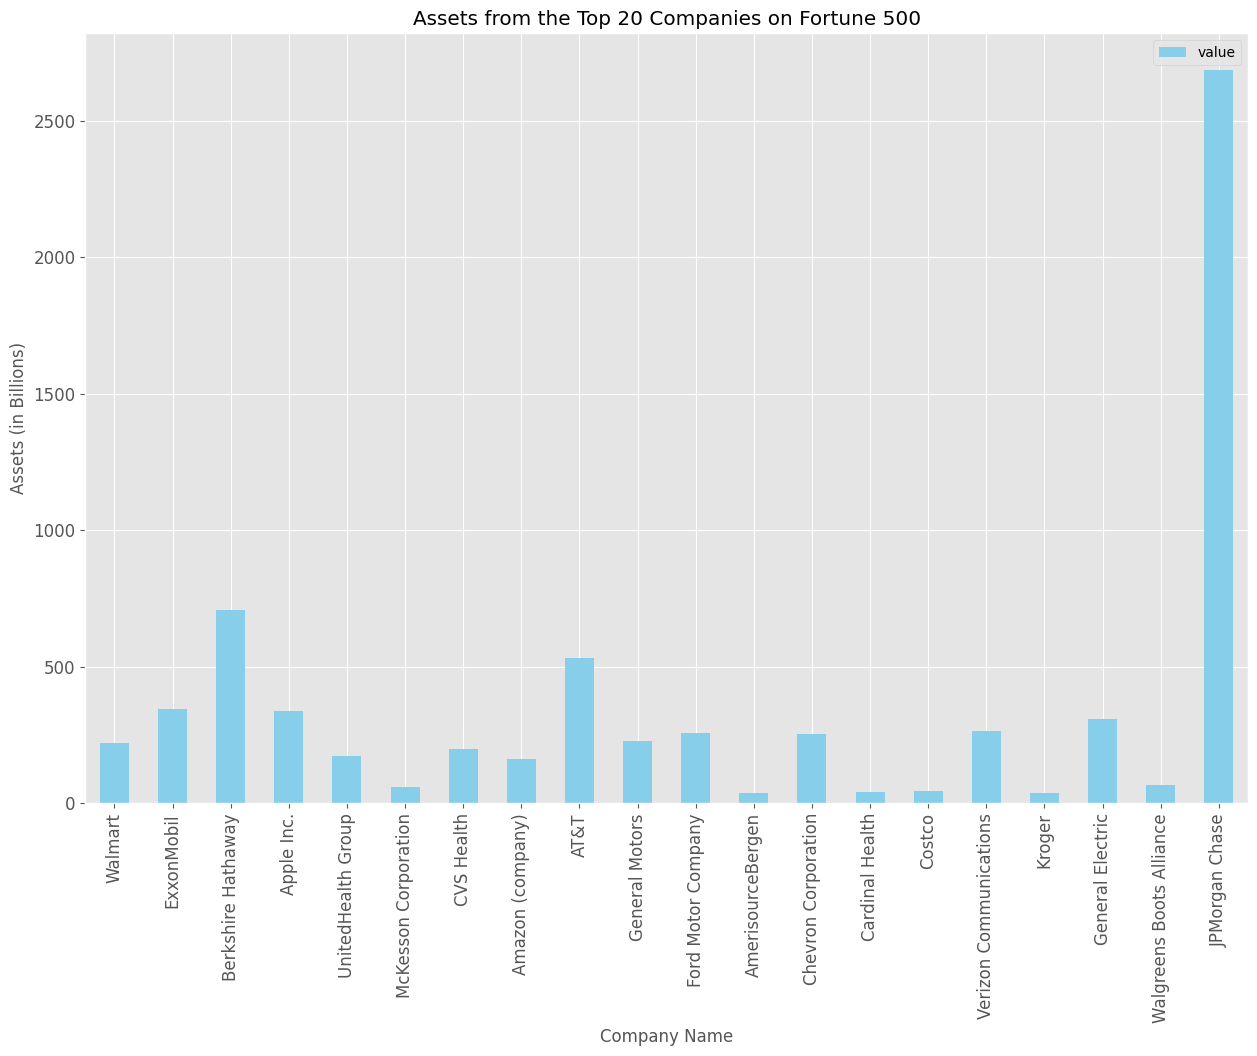

In [3]:
#9921005153-G.SATHEESH KUMAR
import re
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import urllib.request
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/infoboxes.json'
urllib.request.urlretrieve(url, 'infoboxes.json')
with open('infoboxes.json', 'r') as file:
  wiki_data = json.load(file)
wiki_data[0]
for i in range(0,3):
 print(wiki_data[i]['products'])
 print('\n')
regex = re.compile(r'[\w\s-]+')
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']
products = []
data = []
for x in wiki_data:
  product = x['products'].lower()
  product = product.replace(' and ', '|').replace(']]', '')
  product = regex.findall(product) # extract all alphanumeric occurences
  product = [p.strip() for p in product] # get rid of leading or trailing whitespace
  # filter rogue words and de-duplicate
  product = list(set([p for p in product if p not in rogue_words]))
  # add to data
  data.append({'wiki_title' : x['company_name'], 'product' : ', '.join(product)})
  # add to list of products
  products.extend(product)
print(products)

def create_wordcloud(items, stopwords=[]):
  text = ' '.join(items)
  wordcloud = WordCloud(width=1600, height=800, margin=0, stopwords=stopwords).generate(text)
  plt.figure( figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()
create_wordcloud(products)
for i in range(0,5):
  print(wiki_data[i]['industry'])
  industries = []
for i, x in enumerate(wiki_data):
  industry = x['industry'].lower()
  industry = industry.replace(' and ', '|').replace(']]', '')
  industry = regex.findall(industry)
  industry = [i.strip() for i in industry]
  industry = list(set([i for i in industry if i not in rogue_words]))
  data[i]['industry'] = ', '.join(industry)
  industries.extend(industry)
print(industries)
create_wordcloud(industries, ['industry']) # adding "industry" to the stopword list
for i in range(0,len(wiki_data)):
  print(wiki_data[i]['assets'])
  regex1 = re.compile('([\d\.]+)')
  regex2 = re.compile('(billion|trillion)')
  assets = []
for i, x in enumerate(wiki_data):
  y = x['assets'] # get assets
  z = regex1.findall(y)[0] # extract assets
  unit = regex2.findall(y)[0] # extract the unit
  asset = float(z) # convert to the numeric
  data[i]['assets'] = str(asset) + ' ' + unit # add to data
  # add to list of assets
  assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})
assets
for i, asset in enumerate(assets):
  if asset['unit'] == 'trillion':
    assets[i]['value'] = asset['value'] * 1000
    assets[i]['unit'] = 'billion'
df_assets = pd.DataFrame(assets)
df_assets
ax = df_assets.plot(kind='bar', title ="Assets from the Top 20 Companies on Fortune 500",color='skyblue',figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()
df_wiki = pd.DataFrame(data)
df_wiki.head()
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/fortune_500_companies.csv'
urllib.request.urlretrieve(url, 'fortune_500_companies.csv')
df = pd.read_csv('fortune_500_companies.csv', nrows=20)
df = pd.concat([df, df_wiki], axis=1)
df
df.to_csv('top_20_companies.csv', index=False)

The shape of our dataset is:  (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38
We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


<ipython-input-6-197528f0f5ff>:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(groupby_invoice['productsNumber'],ax=ax)


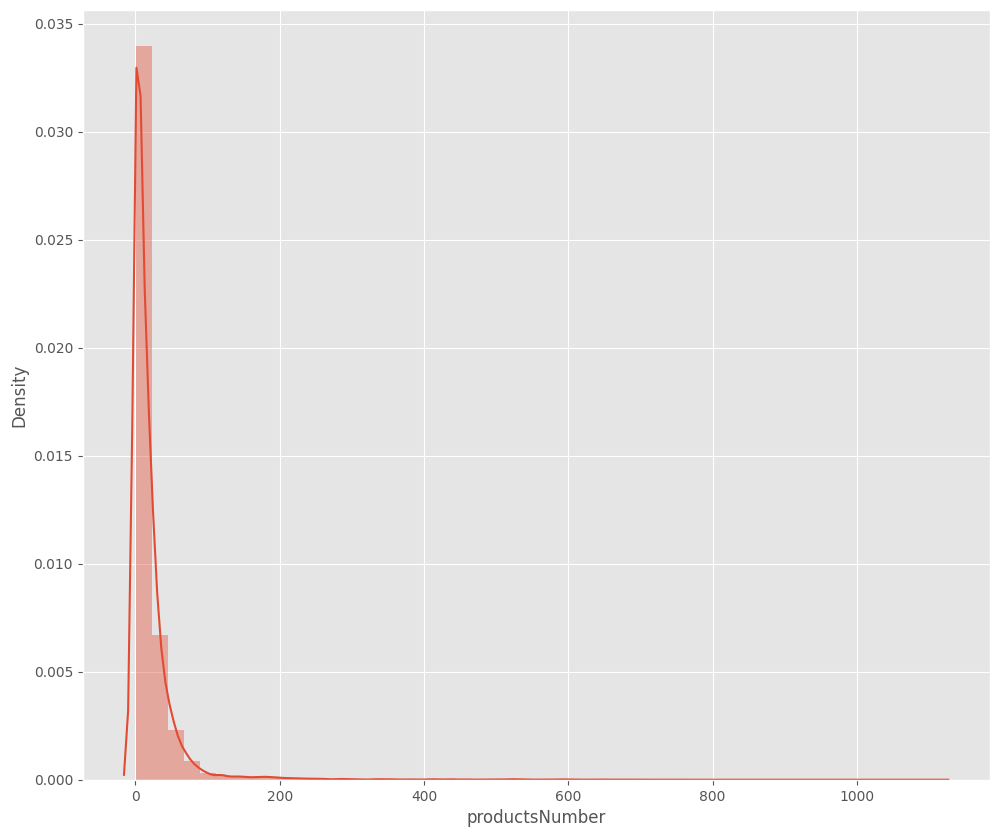

<ipython-input-6-197528f0f5ff>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")


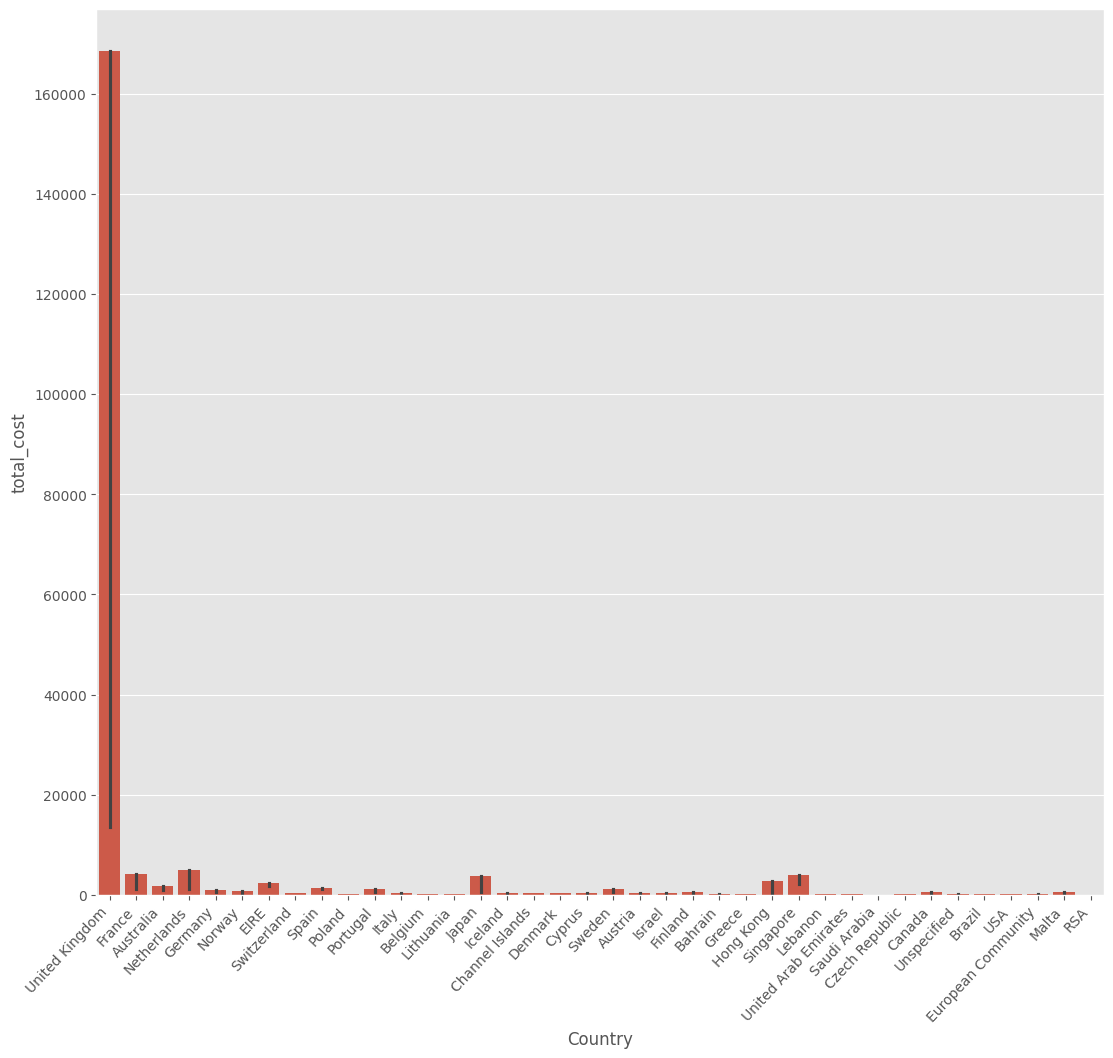

<ipython-input-6-197528f0f5ff>:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)


Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
retail_df = pd.read_excel("Online Retail.xlsx",engine="openpyxl")
print("The shape of our dataset is: ", retail_df.shape)
retail_df.head(10)
retail_df.info()
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() *100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())
retail_df.describe()
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()
cancelled_orders[cancelled_orders['Quantity']>0]
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number,total_orders, cancelled_number/total_orders*100))
groupby_customers =pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()
groupby_invoice =pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()
groupby_invoice.describe()
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()
temp_df=retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()
transaction_df.describe()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()
retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() *100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())
groupedProduct = retail_uk.groupby('StockCode',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)
invoice_quantity= retail_uk.groupby('InvoiceNo',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()